# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Train Data

In [2]:
train_df=pd.read_excel(r"C:\Users\Vicky\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Importing Test Data.

In [3]:
test_df=pd.read_excel(r"C:\Users\Vicky\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
#checking shape of data.
print(train_df.shape,test_df.shape)

(10683, 11) (2671, 10)


In [5]:
#checking data types of train data.
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
#checking data types of test data.
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Features Engineering

In [11]:
#Feature Engineering with Train Data.
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'])
train_df['Month'] = train_df['Date_of_Journey'].dt.month
train_df['Day'] = train_df['Date_of_Journey'].dt.day

In [12]:
#Feature Engineering with Test Data.
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'])
test_df['Month'] = test_df['Date_of_Journey'].dt.month
test_df['Day'] = test_df['Date_of_Journey'].dt.day

In [13]:
#Feature Engineering with Train Data.
train_df['Dep_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_minutes'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [14]:
#Feature Engineering with Test Data.
test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_minutes'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [15]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21,8,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55


In [17]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [19]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55


In [21]:
train_df['Arrival_hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_minutes'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [22]:
#Feature Engineering with Test Data.
test_df['Arrival_hour'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_minutes'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [24]:
#train_df['Duration'] = train_df['Duration'].str.replace('19h0', '19h 0m')

In [25]:
#preproceesing the duration
duration = list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
train_df['Duration_hours'] = dur_hours
train_df['Duration_minutes'] =dur_minutes

In [26]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [27]:
#preproceesing the duration
duration = list(test_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
test_df['Duration_hours'] = dur_hours
test_df['Duration_minutes'] =dur_minutes

In [28]:
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55,2,45,2,50


In [29]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)
test_df.drop(['Arrival_Time'],axis=1,inplace=True)

train_df.drop(['Duration'],axis=1,inplace=True)
test_df.drop(['Duration'],axis=1,inplace=True)

In [30]:
train_df.drop(['Route'],axis=1,inplace=True)
test_df.drop(['Route'],axis=1,inplace=True)

In [31]:
train_df.drop(['Additional_Info'],axis=1,inplace=True)
test_df.drop(['Additional_Info'],axis=1,inplace=True)

In [32]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [33]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,6,24,23,55,2,45,2,50


In [34]:
train_df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         1
Price               0
Month               0
Day                 0
Dep_hour            0
Dep_minutes         0
Arrival_hour        0
Arrival_minutes     0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [35]:
test_df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Month               0
Day                 0
Dep_hour            0
Dep_minutes         0
Arrival_hour        0
Arrival_minutes     0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [36]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [37]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
train_df['Total_Stops']=imp.fit_transform(train_df['Total_Stops'].values.reshape(-1,1))

In [38]:
train_df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Month               0
Day                 0
Dep_hour            0
Dep_minutes         0
Arrival_hour        0
Arrival_minutes     0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [39]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [42]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,6,24,23,55,2,45,2,50


In [43]:
train_df.describe()

,Total_Stops,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630,10.246092,28.327717
std,0.675199,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036,8.495414,16.945400
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


# Data Visualization

# Correlation

<AxesSubplot:>

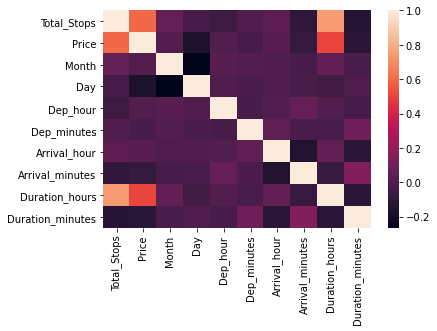

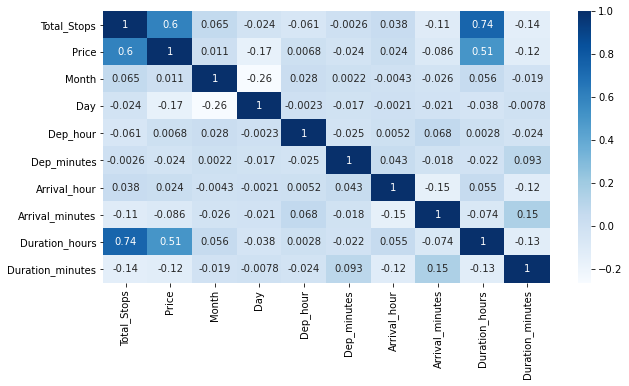

In [44]:
dfcor=train_df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(10,5))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# Univariate Analysis

Text(0.5, 1.0, 'Airline')

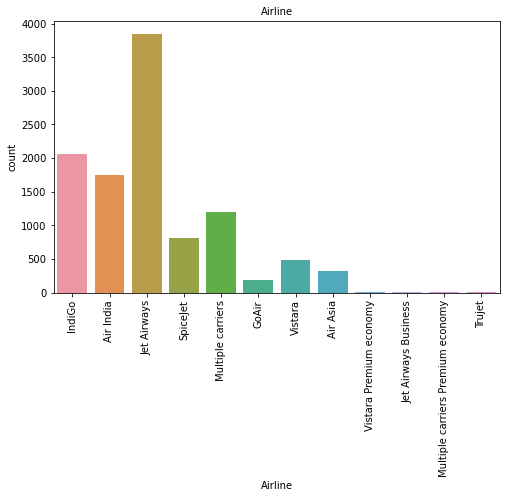

In [46]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=train_df, x="Airline")
plt.xticks(rotation=90)
plt.title("Airline", fontsize = 10)

Jet-Airways is the highest count according to above.

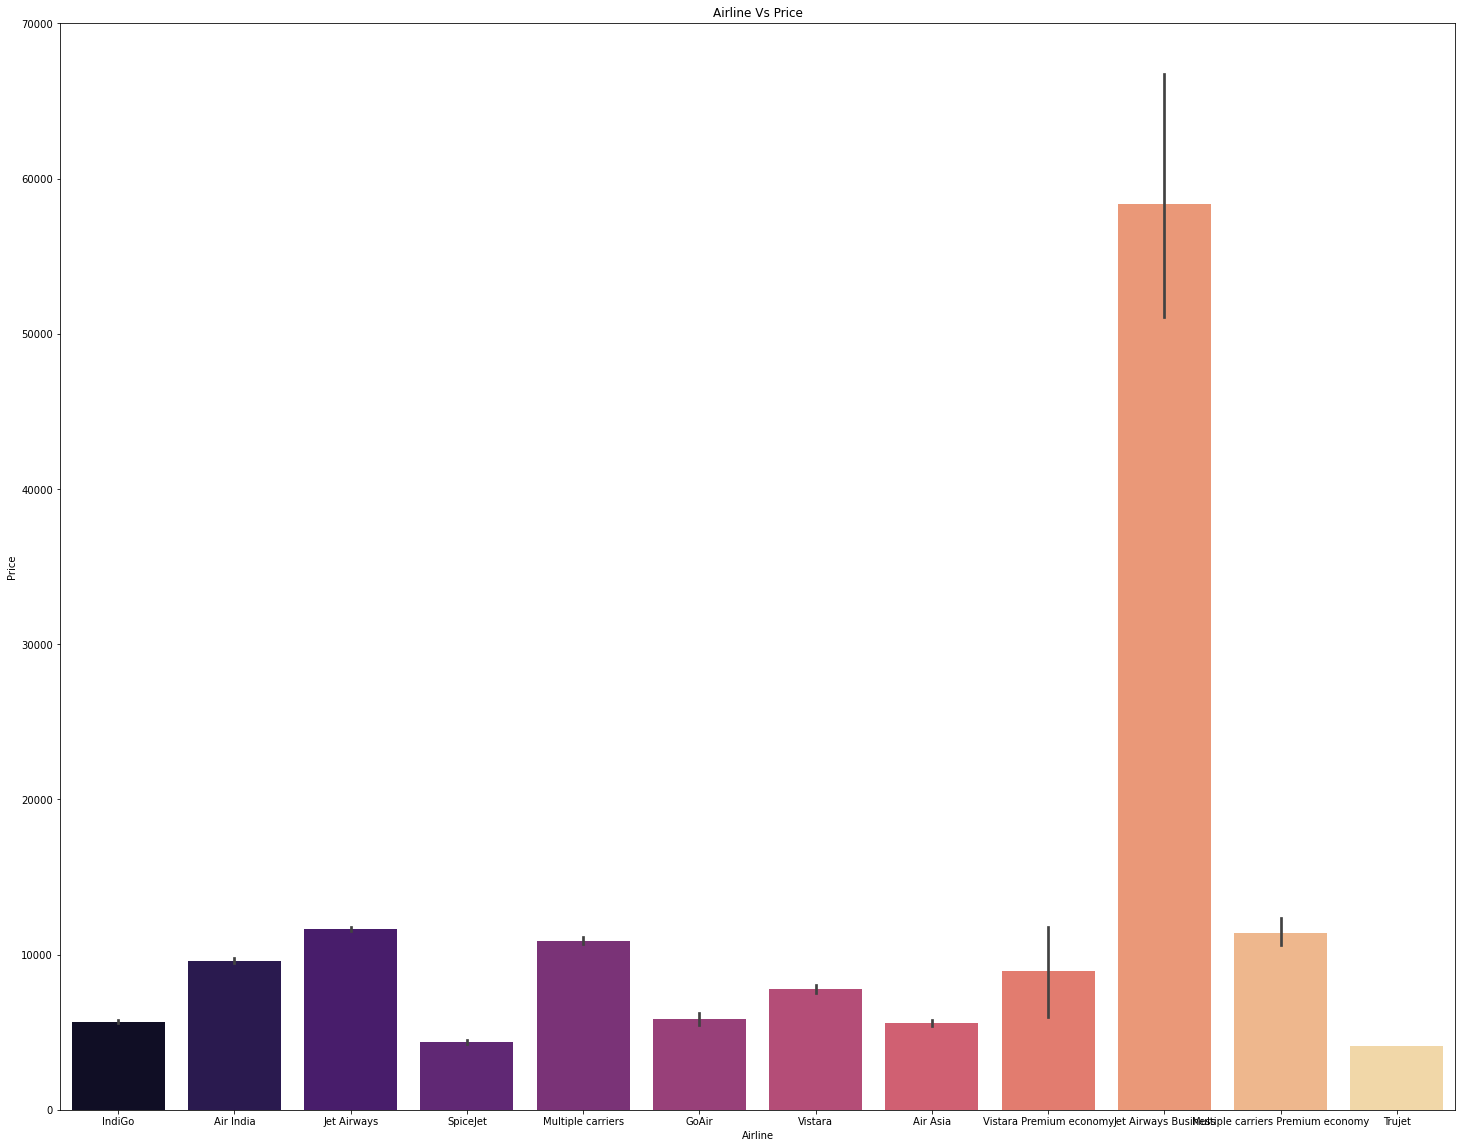

In [47]:
plt.figure(figsize=(25,20))
sns.barplot(x='Airline',y='Price',data=train_df,palette='magma')
plt.title("Airline Vs Price")
plt.show()

Jet Airways Business is very expensive then others.

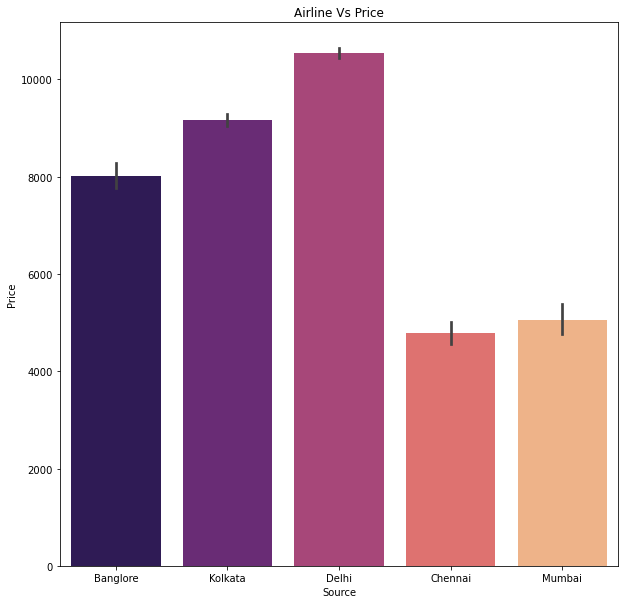

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(x='Source',y='Price',data=train_df,palette='magma')
plt.title("Airline Vs Price")
plt.show()

According to data Delhi sourece is highest in price.

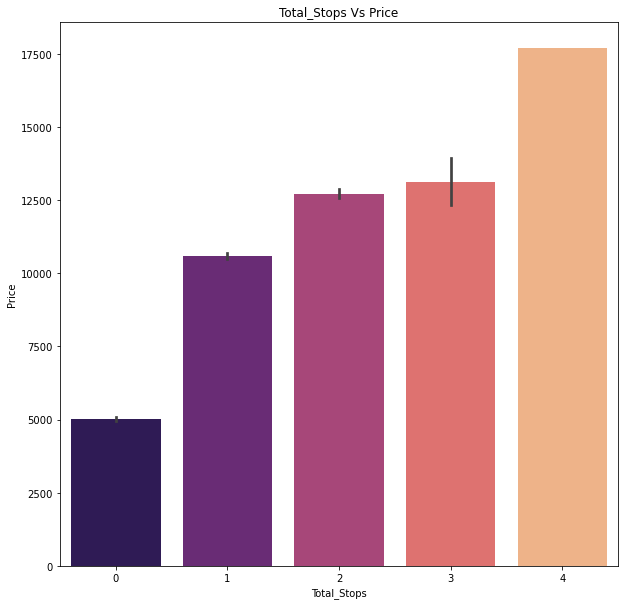

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(x='Total_Stops',y='Price',data=train_df,palette='magma')
plt.title("Total_Stops Vs Price")
plt.show()

Highest stope are 4

# Feature Engg.
creating Dummies

In [50]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [51]:
Airline = train_df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

In [52]:
Source = train_df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

In [53]:
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [54]:
Train = pd.concat([train_df, Airline, Source, Destination], axis = 1)

In [55]:
Train.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [56]:
Train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [57]:
Train.head()

,Total_Stops,Price,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
Airline = test_df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

In [59]:
Source = test_df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

In [60]:
Destination = test_df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [61]:
Test = pd.concat([test_df, Airline, Source, Destination], axis = 1)

In [62]:
Test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [63]:
Test.head()

,Total_Stops,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Spliting the Independent and Target Variables.

In [64]:
x=Train.drop('Price',axis=1)
y=Train['Price']

In [65]:
print(x.shape,y.shape)

(10683, 29) (10683,)


# Data Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Total_Stops,Month,Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,0.181818,0.875000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.000000,0.083333,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.727273,0.125000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,1.000000,0.083333,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.00,0.727273,0.041667,0.826087,1.000000,0.956522,0.454545,0.042553,0.545455,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10679,0.00,0.272727,1.000000,0.869565,0.818182,1.000000,0.363636,0.042553,0.636364,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10680,0.00,0.272727,1.000000,0.347826,0.363636,0.478261,0.363636,0.063830,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.042553,0.727273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
X=dx

# Features Selection

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

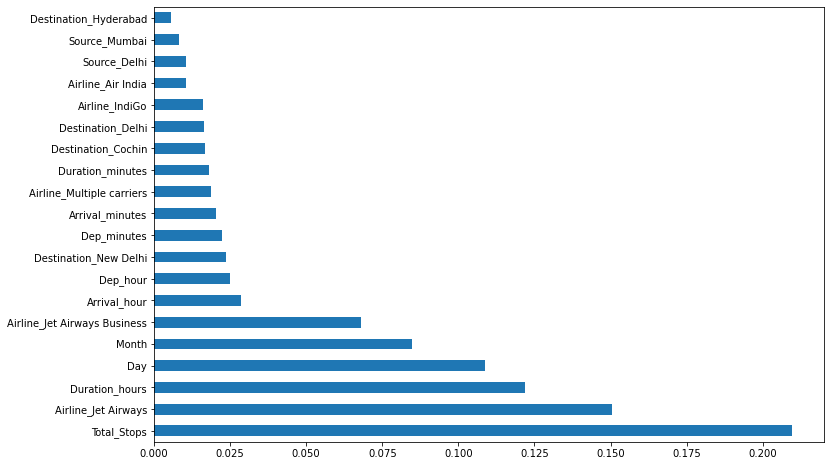

In [69]:
plt.figure(figsize = (12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Finding best Random State for train test split.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predf = LR.predict(X_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.6641688199025995  on Random State  670


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=670)

In [72]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7478, 29) (7478,) (3205, 29) (3205,)


# LinearRegression

In [73]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [74]:
LR.coef_

array([ 1.09816886e+04, -1.06964461e+03, -1.84449716e+03,  4.79632260e+02,
       -5.45431291e+01, -2.09439545e+02,  6.90753288e+01, -1.40248728e+02,
       -2.35211005e+02,  1.55075854e+03, -9.35176231e+01,  1.88536192e+02,
        4.25931554e+03,  4.90097766e+04,  3.60829089e+03,  4.49450479e+03,
       -3.59397939e+02, -2.19662294e+03,  2.18632351e+03,  3.02008833e+03,
        7.08860807e+14,  8.30119186e+14,  1.52584486e+15,  6.76999147e+14,
        6.95725674e+14,  1.52584486e+15,  8.48845713e+14,  8.16984053e+14,
        1.52584486e+15])

In [75]:
LR.score(X_train,y_train)

0.5974908434625537

In [76]:
pred=LR.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [11265.25  2232.25  7788.75 ...  6953.25  8163.75 15079.75]
error:
Mean absolute error: 1938.8073322932917
Mean squared error: 7133465.395436818
Root Mean Squared error: 2670.8548061317033
0.6641688199025995


# RandomForestRegressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
predrf=rf.predict(X_test)
print('Predicted Result Price:',predrf)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

Predicted Result Price: [11172.52  3481.67  6503.11 ...  3680.79  6318.   20497.48]
error:
Mean absolute error: 1145.7810734005377
Mean squared error: 4086964.729774738
Root Mean Squared error: 2021.6242800715315
0.8075927880585649


# DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
pred=dtc.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [11200.   3603.   6674.  ...  3687.   5636.  20641.5]
error:
Mean absolute error: 1343.4797451898078
Mean squared error: 6420743.697590657
Root Mean Squared error: 2533.9186446274584
0.6977225214488088


# AdaBoostRegressor

In [79]:
from sklearn.ensemble import AdaBoostRegressor
ad=RandomForestRegressor(n_estimators=100)
ad.fit(X_train,y_train)
ad.score(X_train,y_train)
pred=ad.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [11174.5     3417.89    6511.29   ...  3680.92    6114.37   20396.7675]
error:
Mean absolute error: 1146.9763715462298
Mean squared error: 4009951.131385653
Root Mean Squared error: 2002.486237502184
0.8112184547152083


# KNeighborsRegressor

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred=knn.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [12532.8  3041.4  5896.4 ...  5020.4  6196.8 19215.6]
error:
Mean absolute error: 1564.4300156006238
Mean squared error: 6788140.981129486
Root Mean Squared error: 2605.406106757541
0.6804260944731693


# Cross Validation

We are Cross validating the models to see thre are underfitting or overfitting present or not.

In [81]:
from sklearn.model_selection import cross_val_score
LR=cross_val_score(LR,X,y,cv=5)
print("Cross Validation Score of Linear Regression Model:", LR.mean())

Cross Validation Score of Linear Regression Model: -7123448839615668.0


In [82]:
RFR=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", RFR.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.8032265419480336


In [83]:
DTC=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", DTC.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.700491020540474


In [84]:
AD=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", AD.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.8016951116815104


In [85]:
KNN=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", KNN.mean())

Cross Validation Score of Rendom Forest Regressor Model: 0.7130654032700301


# Hyper parameter tuning

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
parameters = {'bootstrap': [True],'criterion': ['mse'],'max_depth':[None],'n_estimators':[10], 'random_state':[42]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.7648433106848117
Residual sum of squares: 4143559.35


# Prediction

In [87]:
import numpy as np
a = np.array(y_test)
predicted = np.array(predrf)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,10877,11172.520
1,2754,3481.670
2,6674,6503.110
3,4353,7583.645
4,4423,4366.890
...,...,...
3200,9134,15102.388
3201,3100,3466.950
3202,3687,3680.790
3203,5636,6318.000


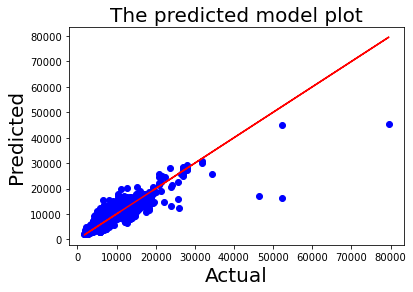

In [88]:
plt.scatter(x=y_test, y=predrf, color = "blue")
plt.plot(y_test,y_test, color='r')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()

# Saving Final Model

In [ ]:
import joblib
joblib.dump(rf,'Flight_Fare.obj')